# Loading data and overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.shape

(150, 6)

In [3]:
data.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
sns.set_style('whitegrid')
sns.set_palette('viridis')

plt.figure(figsize=(18, 15))

<Figure size 1800x1500 with 0 Axes>

<Figure size 1800x1500 with 0 Axes>

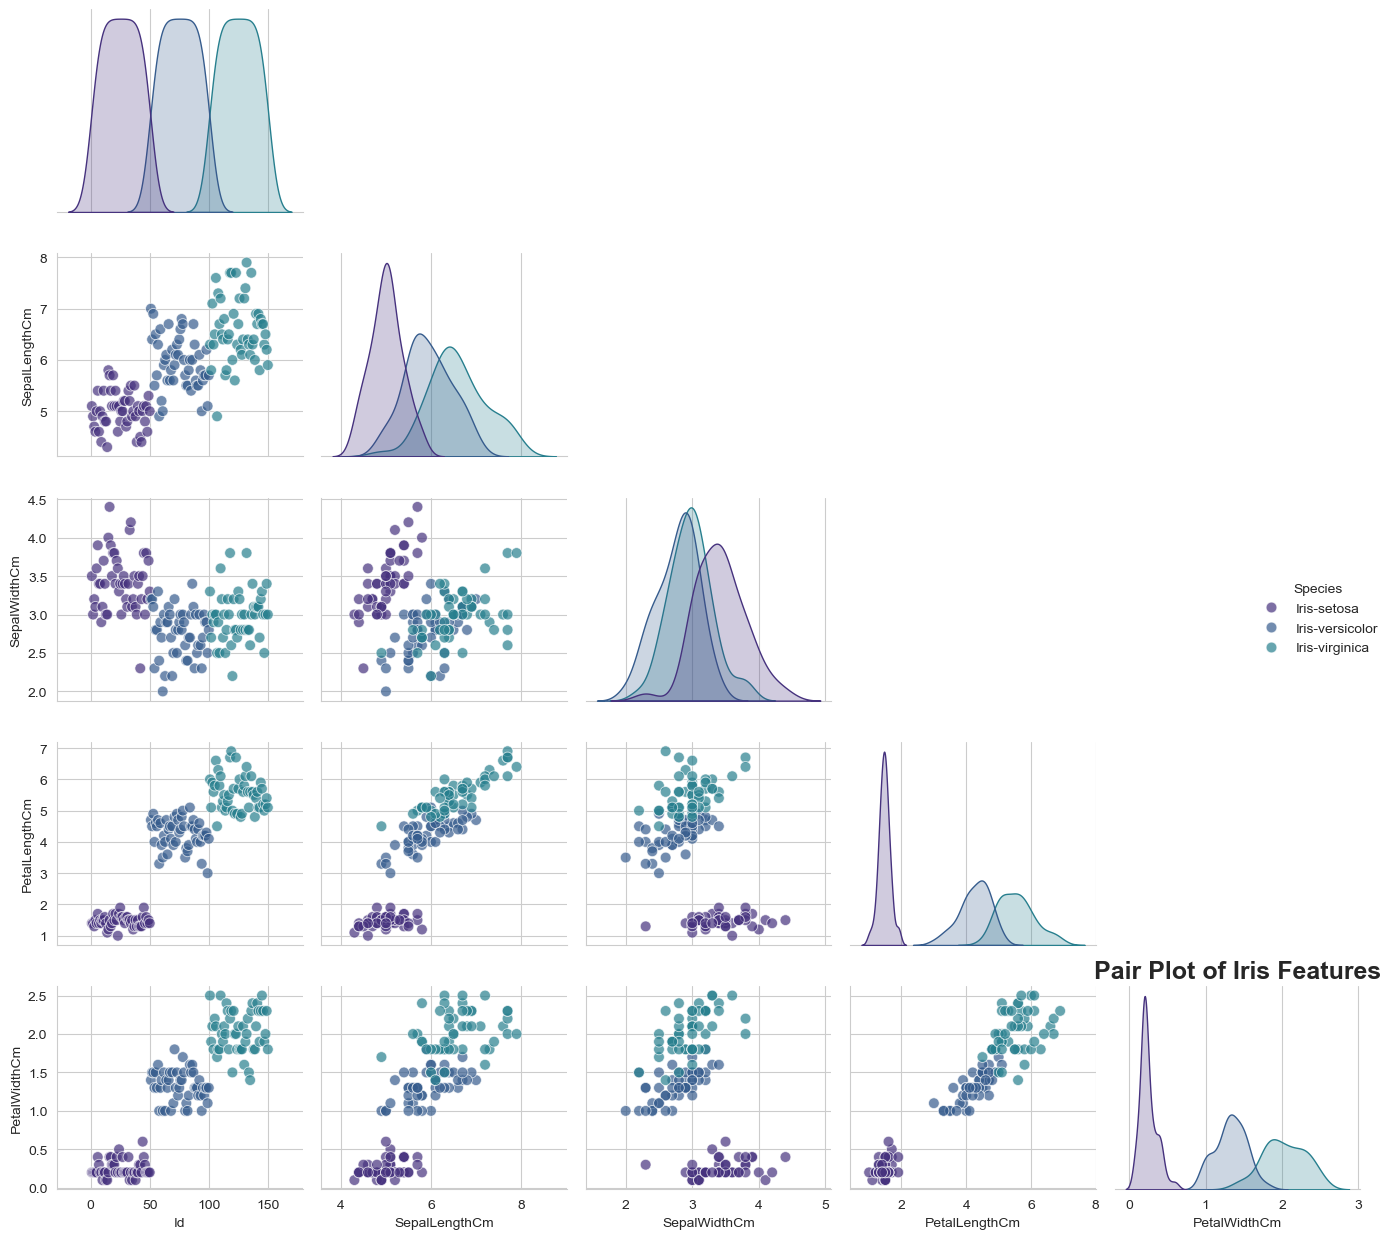

In [36]:
sns.pairplot(data, hue='Species', corner=True, plot_kws={'alpha': 0.7, 's': 60})
plt.gca().set_title('Pair Plot of Iris Features', fontsize=18, weight='bold')
plt.title('Pair Plot of Iris Features', fontsize=18, weight='bold')
plt.tight_layout()
plt.show();

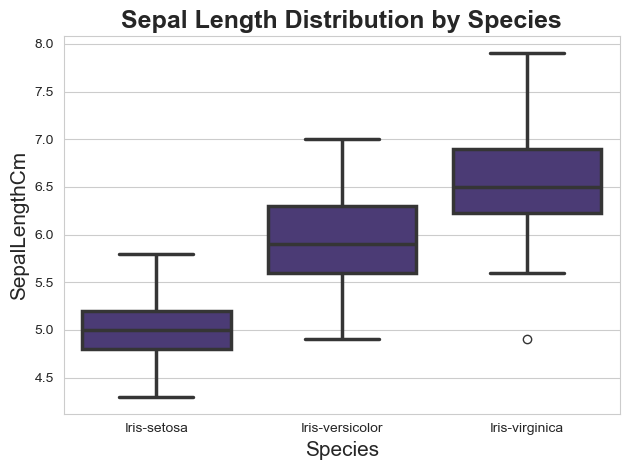

In [35]:
sns.boxplot(data=data, x='Species', y='SepalLengthCm', linewidth=2.5)
plt.title('Sepal Length Distribution by Species', fontsize=18, weight='bold')
plt.xlabel('Species', fontsize=15)
plt.ylabel('SepalLengthCm', fontsize=15)
plt.tight_layout()
plt.show();

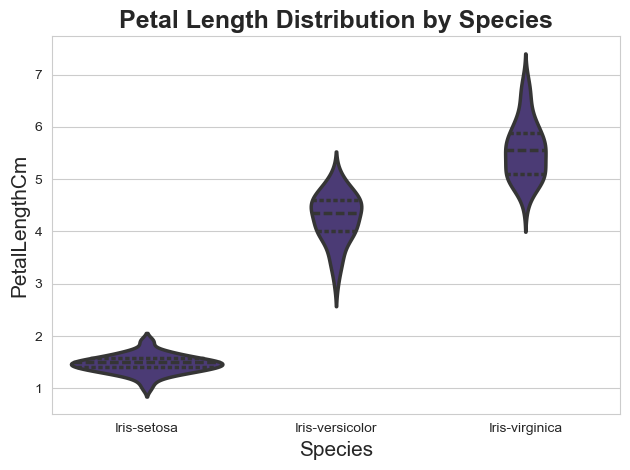

In [34]:
sns.violinplot(data=data, x='Species', y='PetalLengthCm', linewidth=2.5, inner='quartile')
plt.title('Petal Length Distribution by Species', fontsize=18, weight='bold')
plt.xlabel('Species', fontsize=15)
plt.ylabel('PetalLengthCm', fontsize=15)
plt.tight_layout()
plt.show();

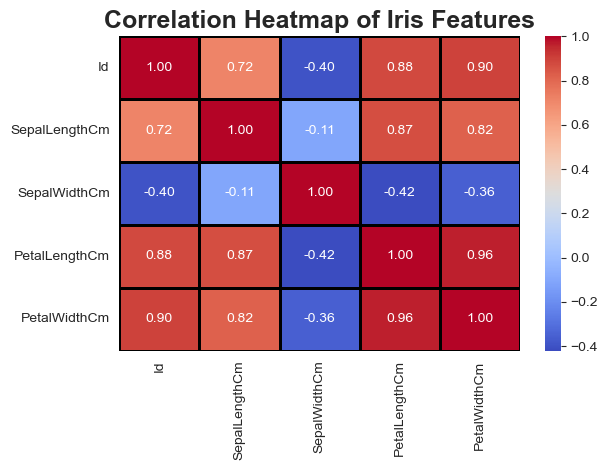

In [33]:
corr = data.drop(columns=['Species']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=2, linecolor='black', fmt='.2f')
plt.title('Correlation Heatmap of Iris Features', fontsize=18, weight='bold')
plt.tight_layout()
plt.show();

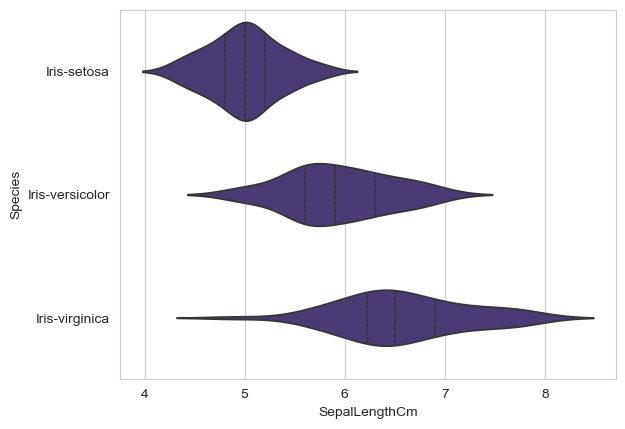

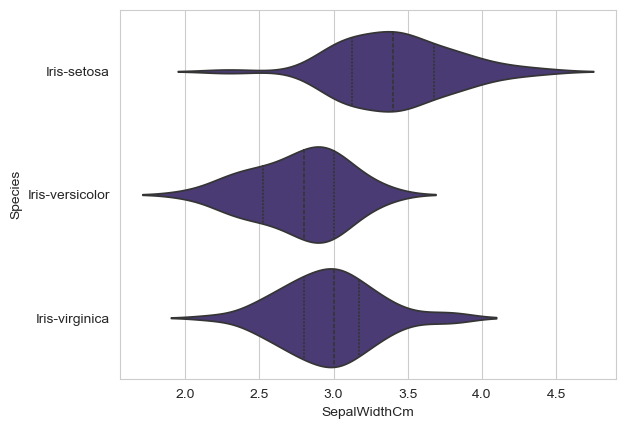

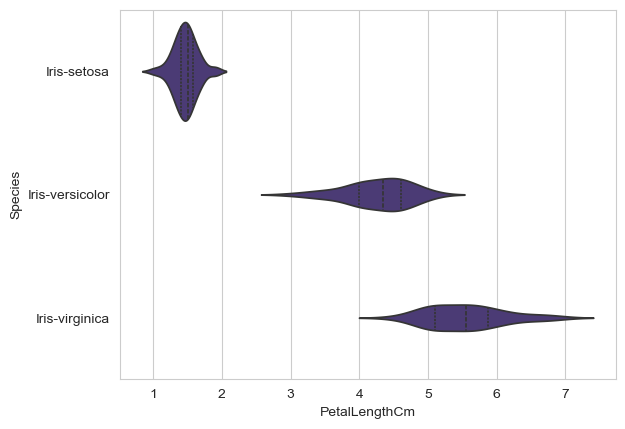

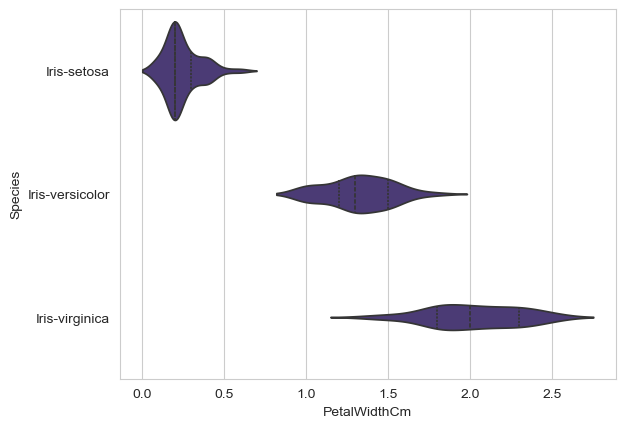

In [32]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

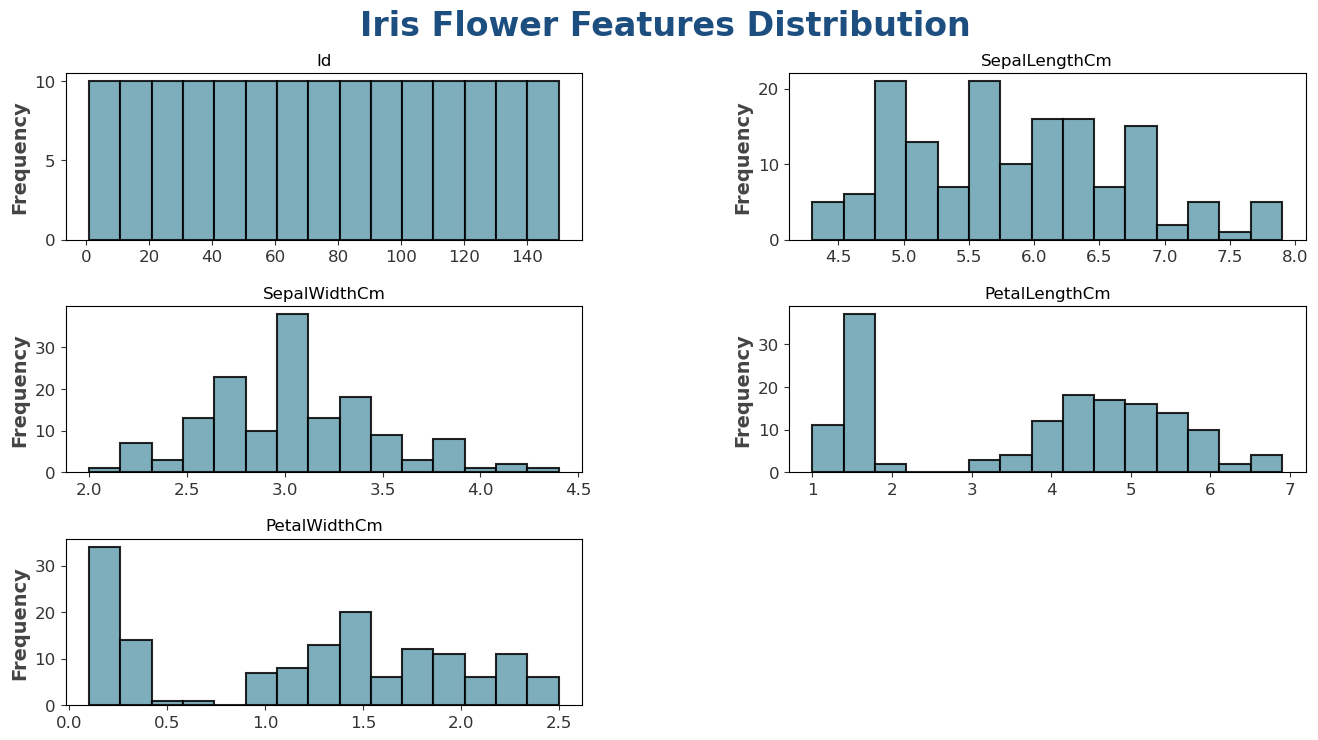

In [9]:
data.hist(
    edgecolor='black', 
    linewidth=1.5, 
    color='#68a0b0', 
    alpha=0.85, 
    grid=False, 
    bins=15
)

fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.suptitle('Iris Flower Features Distribution', fontsize=24, fontweight='bold', color='#1c4e80')
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)

for ax in fig.get_axes():
    ax.set_xlabel(ax.get_xlabel().title(), fontsize=14, fontweight='bold', color='#444444')
    ax.set_ylabel('Frequency', fontsize=14, fontweight='bold', color='#444444')
    ax.tick_params(axis='both', which='major', labelsize=12, colors='#333333')
    
plt.show();

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import joblib

In [15]:
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [16]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y =test.Species

In [17]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
86,6.7,3.1,4.7,1.5
48,5.3,3.7,1.5,0.2


In [18]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
21,5.1,3.7,1.5,0.4
127,6.1,3.0,4.9,1.8


### SVM

In [21]:
SVM = svm.SVC()
SVM.fit(train_X,train_y)
prediction=SVM.predict(test_X)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

SVC()

The accuracy of the SVM is: 0.9555555555555556


In [22]:
joblib.dump(SVM, 'svm_model.joblib')
print("✅ Model exported as 'svm_model.joblib'")

['svm_model.joblib']

✅ Model exported as 'svm_model.joblib'


### Logistic Regression

In [23]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

LogisticRegression()

The accuracy of the Logistic Regression is 0.9555555555555556


In [24]:
joblib.dump(model, 'Logistic_regression.joblib')
print("✅ Model exported as 'Logistic_regression.joblib'")

['Logistic_regression.joblib']

✅ Model exported as 'Logistic_regression.joblib'


### Decision Tree

In [25]:
DT=DecisionTreeClassifier()
DT.fit(train_X,train_y)
prediction=DT.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

DecisionTreeClassifier()

The accuracy of the Decision Tree is 0.8888888888888888


In [26]:
joblib.dump(DT, 'Decision_Tree.joblib')
print("✅ Model exported as 'Decision_Tree.joblib'")

['Decision_Tree.joblib']

✅ Model exported as 'Decision_Tree.joblib'


### KNN

In [27]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

KNeighborsClassifier()

The accuracy of the KNN is 0.9333333333333333


In [28]:
joblib.dump(model, 'KNN.joblib')
print("✅ Model exported as 'KNN.joblib'")

['KNN.joblib']

✅ Model exported as 'KNN.joblib'
